***CENSUS INCOME***


The prediction task is to determine whether a person makes over $50K a
year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent
estimates of the civilian non-institutional population of the US. 

These are prepared monthly for us by Population Division here at the Census Bureau.
We use 3 sets of controls. 
These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and &quot;rake&quot; 
through them 6 times so that by the end we come back to all the controls we used. 

The term estimate refers to population totals derived from CPS by creating &quot;weighted tallies&quot; of any specified socio-
economic characteristics of the population. 

People with similar demographic characteristics should have similar weights. 

There is one important caveat to remember about this statement.

That is that since the CPS sample is actually a collection of 51 state samples, each with its own
probability of selection, the statement only applies within state.


In [144]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [145]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


we have 32560 rows and 15 columns


***description of columns in our data set***

-Age: Age of the individual

-Workclass: The type of employment

-Fnlwgt: Final weight, a weightage parameter used in Census data

-Education: Highest education level

-Education_num: Numeric representation of education level

-Marital_status: Marital status of the individual

-Occupation: Occupation of the individual

-Relationship: Relationship status

-Race: Race of the individual

-Sex: Gender of the individual

-Capital_gain: Capital gains

-Capital_loss: Capital losses

-Hours_per_week: Number of hours worked per week

-Native_country: Country of origin

-Income: Income level (<=50K or >50K)






***Data Preprocessing***

In [146]:
#checking column names

df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [147]:
#checking datatypes

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [148]:
#checking data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In our columns, there is integers values and object values

our data set doesnot have any null values.

In [149]:
#checking if any whitespace, 'NA' or '-' exist in dataset
df.isin([' ','NA','-']).sum().any()

False

In [150]:
# Check for '?' in dataset
round((df.isin([' ?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

Age                0.0 %
Workclass         5.64 %
Fnlwgt             0.0 %
Education          0.0 %
Education_num      0.0 %
Marital_status     0.0 %
Occupation        5.66 %
Relationship       0.0 %
Race               0.0 %
Sex                0.0 %
Capital_gain       0.0 %
Capital_loss       0.0 %
Hours_per_week     0.0 %
Native_country    1.79 %
Income             0.0 %
dtype: object

The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed

In [151]:
df= df.replace(' ?', np.nan)

In [152]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [153]:
#filling Nan's


df['Workclass'].fillna(df['Workclass'].mode()[0], inplace=True)

df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)

df['Native_country'].fillna(df['Native_country'].mode()[0], inplace=True)

-In the categorical columns, we filled the missing values with the mode method.



In [154]:
# checking number of unique values in each column
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

-now, no missing values in out data set

In [155]:
df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

In [157]:
df.shape

(32560, 15)

our target column has 2 unique values. people with 50k income and people having more than 50k income.


***Exploring our target column 'Income'*** 

In [156]:
# Number of records where individual's income is more than $50,000
n_more_50k = df[df['Income'] == ' <=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_50k = df[df['Income'] == ' >50K'].shape[0]

n_records = df.shape[0]
# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

print("Individuals making more than $50k: {}".format(n_more_50k))

print("Individuals making at most $50k: {}".format(n_at_50k))

print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Individuals making more than $50k: 24719
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


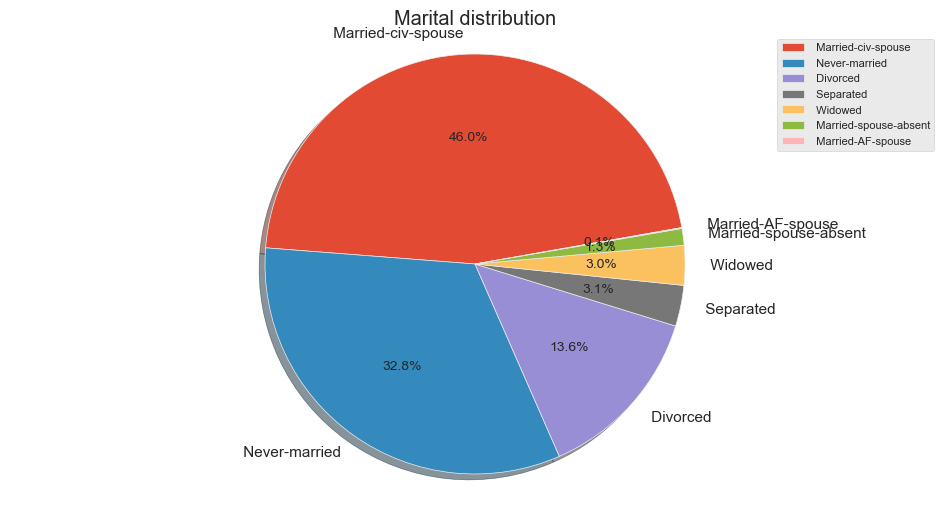

In [171]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(marital.values, labels = marital.index, startangle=10, shadow = True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 8})
plt.axis('equal')
plt.show()

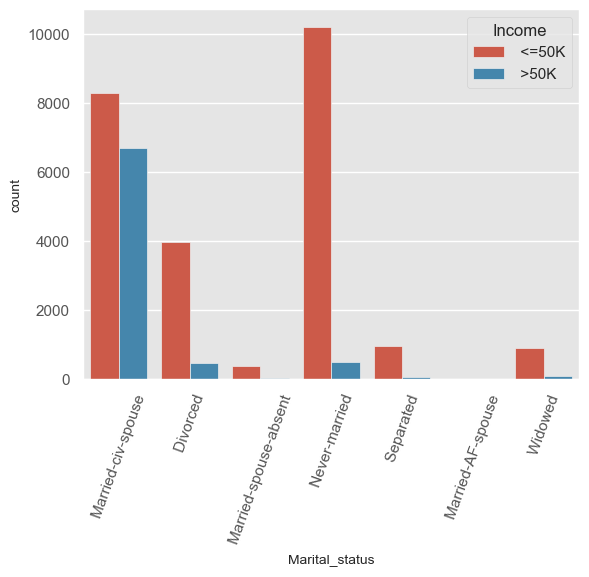

In [172]:
#Lets see How Marital_ststus affects Income
plt.style.use('ggplot')
sns.countplot(x = "Marital_status", hue = "Income", data = df)
plt.xticks(rotation = 70)
plt.show()

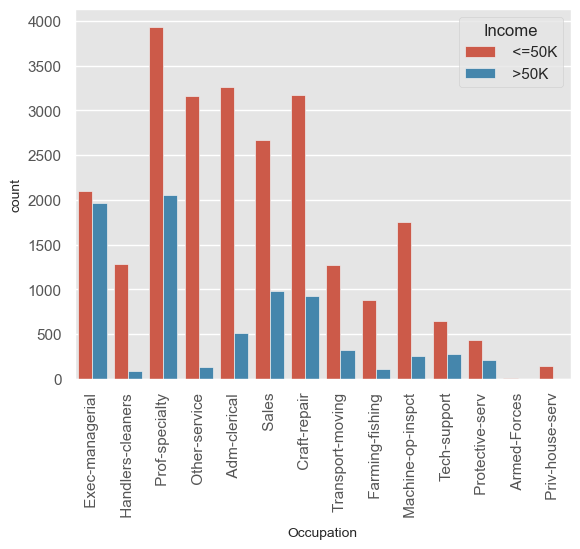

In [173]:
#Lets check Occupation vs income
plt.style.use('ggplot')
sns.countplot(x = "Occupation", hue = "Income", data = df)
plt.xticks(rotation = 90)
plt.show()

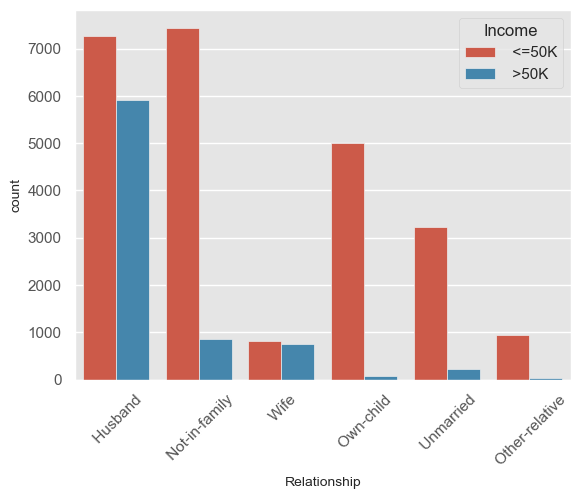

In [174]:
#Lets see the relation between Relationship and Income
sns.countplot(x = "Relationship", hue = "Income", data = df)
plt.xticks(rotation = 45)
plt.show()

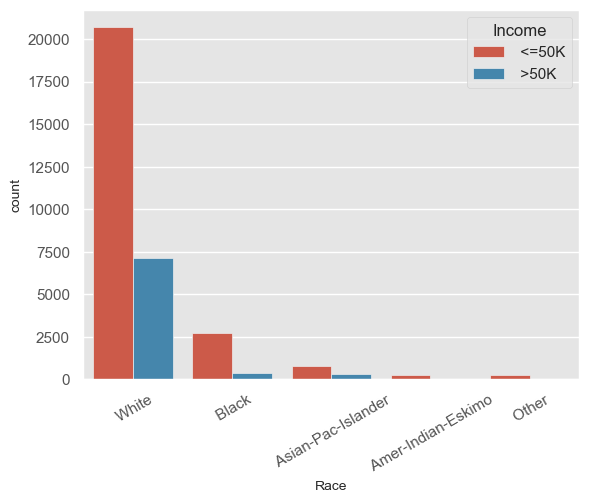

In [176]:
#lets check how Race affects Income
sns.countplot(x = "Race", hue = "Income", data = df)
plt.xticks(rotation = 30)
plt.show()

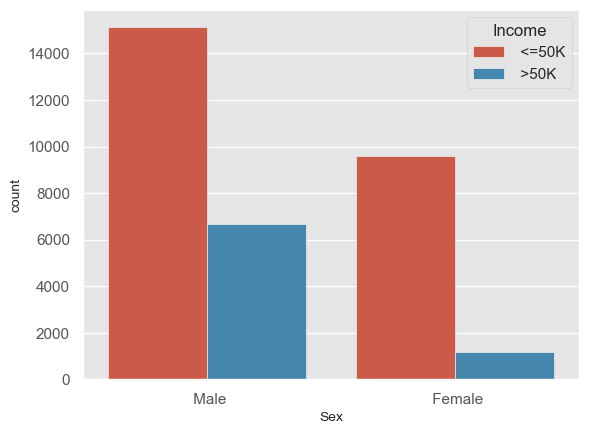

In [177]:
#Lets see distribution of income across sex
sns.countplot(x = "Sex", hue = "Income", data = df)
plt.show()

***Using LabelEncoder for convering categorical to numerical***

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [43]:
from sklearn.preprocessing import LabelEncoder

c_columns=['Workclass','Education','Marital_status','Occupation','Ralationship','Race','Sex','Native_country','Income']

for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


All columns are converted into numerical

In [48]:
# Statistical Summary
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Observations:

Age: The age of individuals ranges from 17 to 90 years, with a mean age of approximately 38.58 years. 

Fnlwgt: The final weight values range from approximately 12,285 to 1,484,705, with a mean value of approximately 189,781.8. 

Education_num: The numeric representation of education levels ranges from 1 to 16, with a mean value of approximately 10.08. 

Capital_gain: Capital gains vary from 0 to 99,999, with a mean value of approximately 1,077.62. 

Capital_loss: Capital losses range from 0 to 4,356, with a mean value of approximately 87.31. 

Hours_per_week: The number of hours worked per week ranges from 1 to 99, with a mean value of approximately 40.44.



In [49]:
#Checking Skewness
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

skewness more than +/- 0.5 will be treated.

object and Income columns will not be treated.

we can see here most of the columns are skewed,Age ,Fnlwgt ,Capital_gain ,Capital_loss


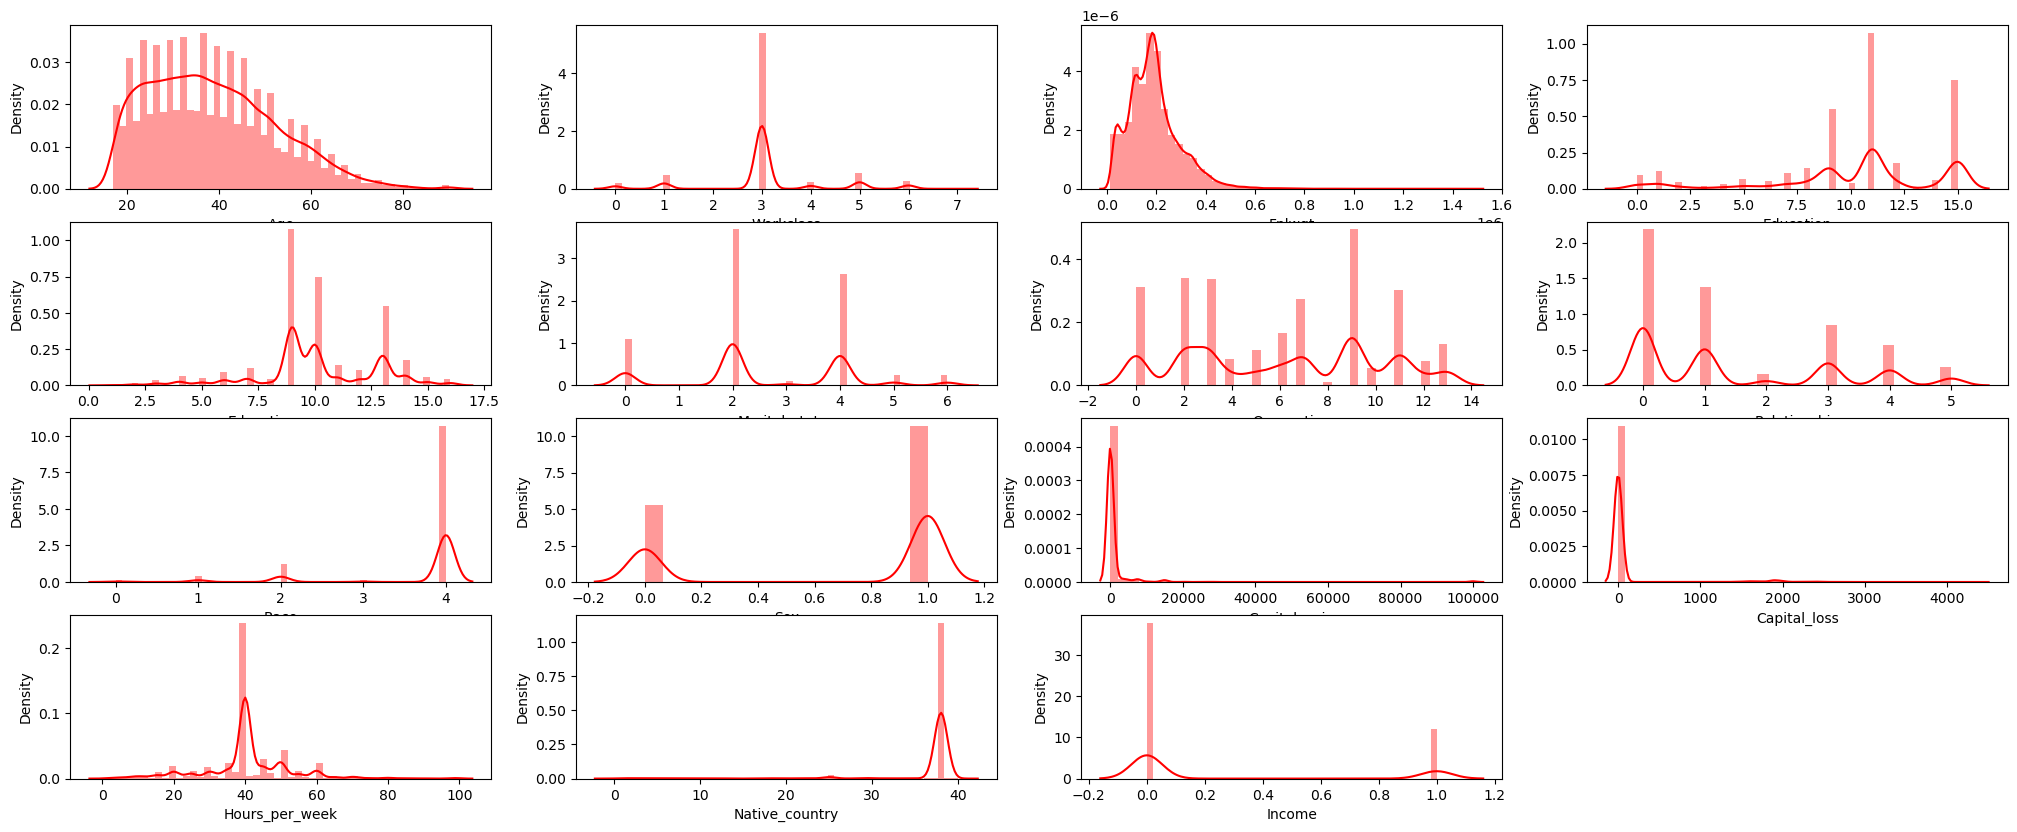

In [50]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [52]:
from sklearn.preprocessing import power_transform

df[['Age','Fnlwgt','Capital_gain','Capital_loss']]=power_transform(
    df[['Age','Fnlwgt','Capital_gain','Capital_loss']])

In [53]:
df.skew()

Age              -0.013897
Workclass         0.076178
Fnlwgt            0.016914
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

In [54]:
#skewness is removed

In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

***Outlier detection and treatment***

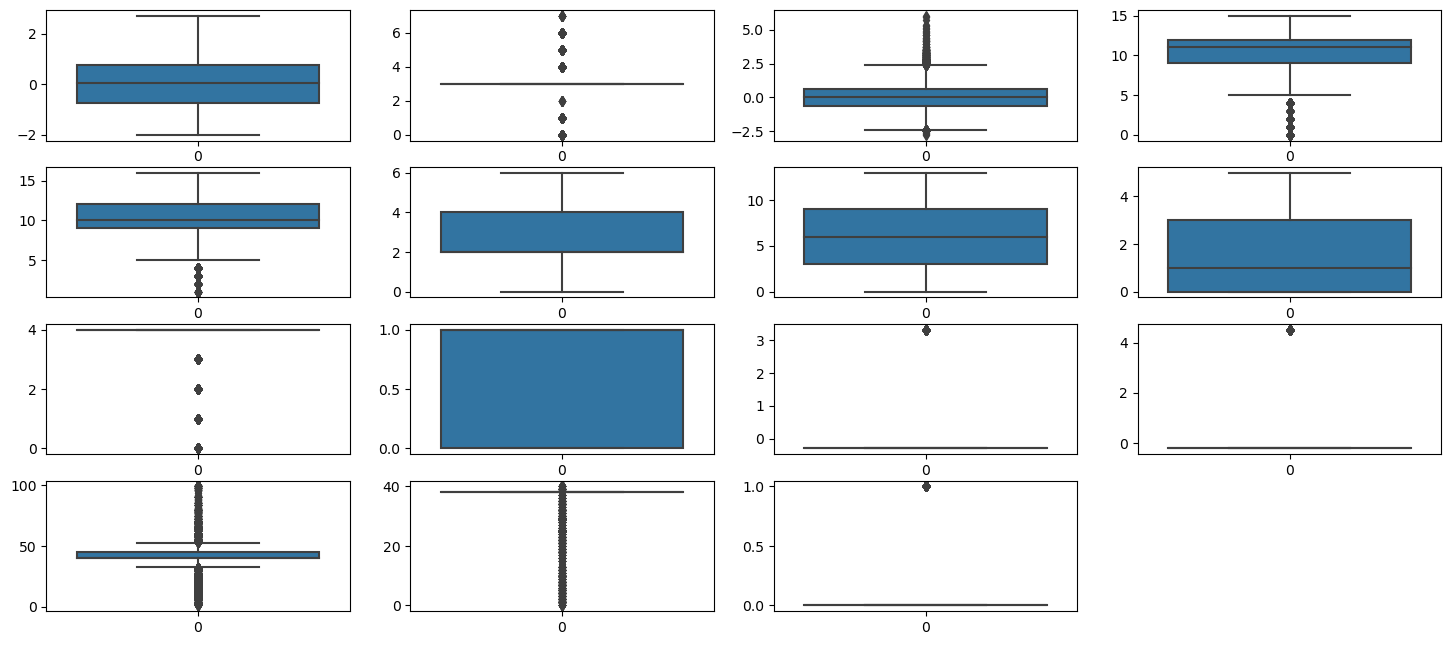

In [56]:
plt.figure(figsize=(18,18))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

-there are outliers present as we can see.


Z-SCORE

In [58]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))
with outliers:: (32560, 15)
After removing outliers:: (25750, 15)


IQR

In [59]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

9.0

DATALOSS:

In [60]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(24847, 15)


In [67]:
df=df_1

chooosing z-score with less data loss

***Correlation***

In [61]:
df_cor = df.corr()
df_cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.037128,-0.068457,0.006515,0.068116,-0.315814,-0.008975,-0.283096,0.022780,0.102062,0.123632,0.056163,0.128168,-0.003224,0.264064
Workclass,0.037128,1.000000,-0.025963,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.011971,-0.001225,0.042206,-0.001646,0.002739
Fnlwgt,-0.068457,-0.025963,1.000000,-0.029094,-0.041339,0.027809,-0.000212,0.009995,-0.014211,0.023510,-0.002915,-0.006268,-0.022200,-0.066744,-0.005229
Education,0.006515,0.004901,-0.029094,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.021326,0.016480,0.055510,0.076062,0.079311
Education_num,0.068116,0.003445,-0.041339,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.115354,0.076396,0.148127,0.088887,0.335182
Marital_status,-0.315814,-0.020545,0.027809,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.062852,-0.036192,-0.190521,-0.021285,-0.199295
Occupation,-0.008975,0.007236,-0.000212,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.009300,0.009786,-0.012881,-0.002205,0.034599
Relationship,-0.283096,-0.057931,0.009995,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.078261,-0.056017,-0.248975,-0.010710,-0.250924
Race,0.022780,0.048323,-0.014211,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.023560,0.018114,0.041910,0.116526,0.071853
Sex,0.102062,0.071535,0.023510,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.064695,0.041319,0.229312,0.002055,0.215995


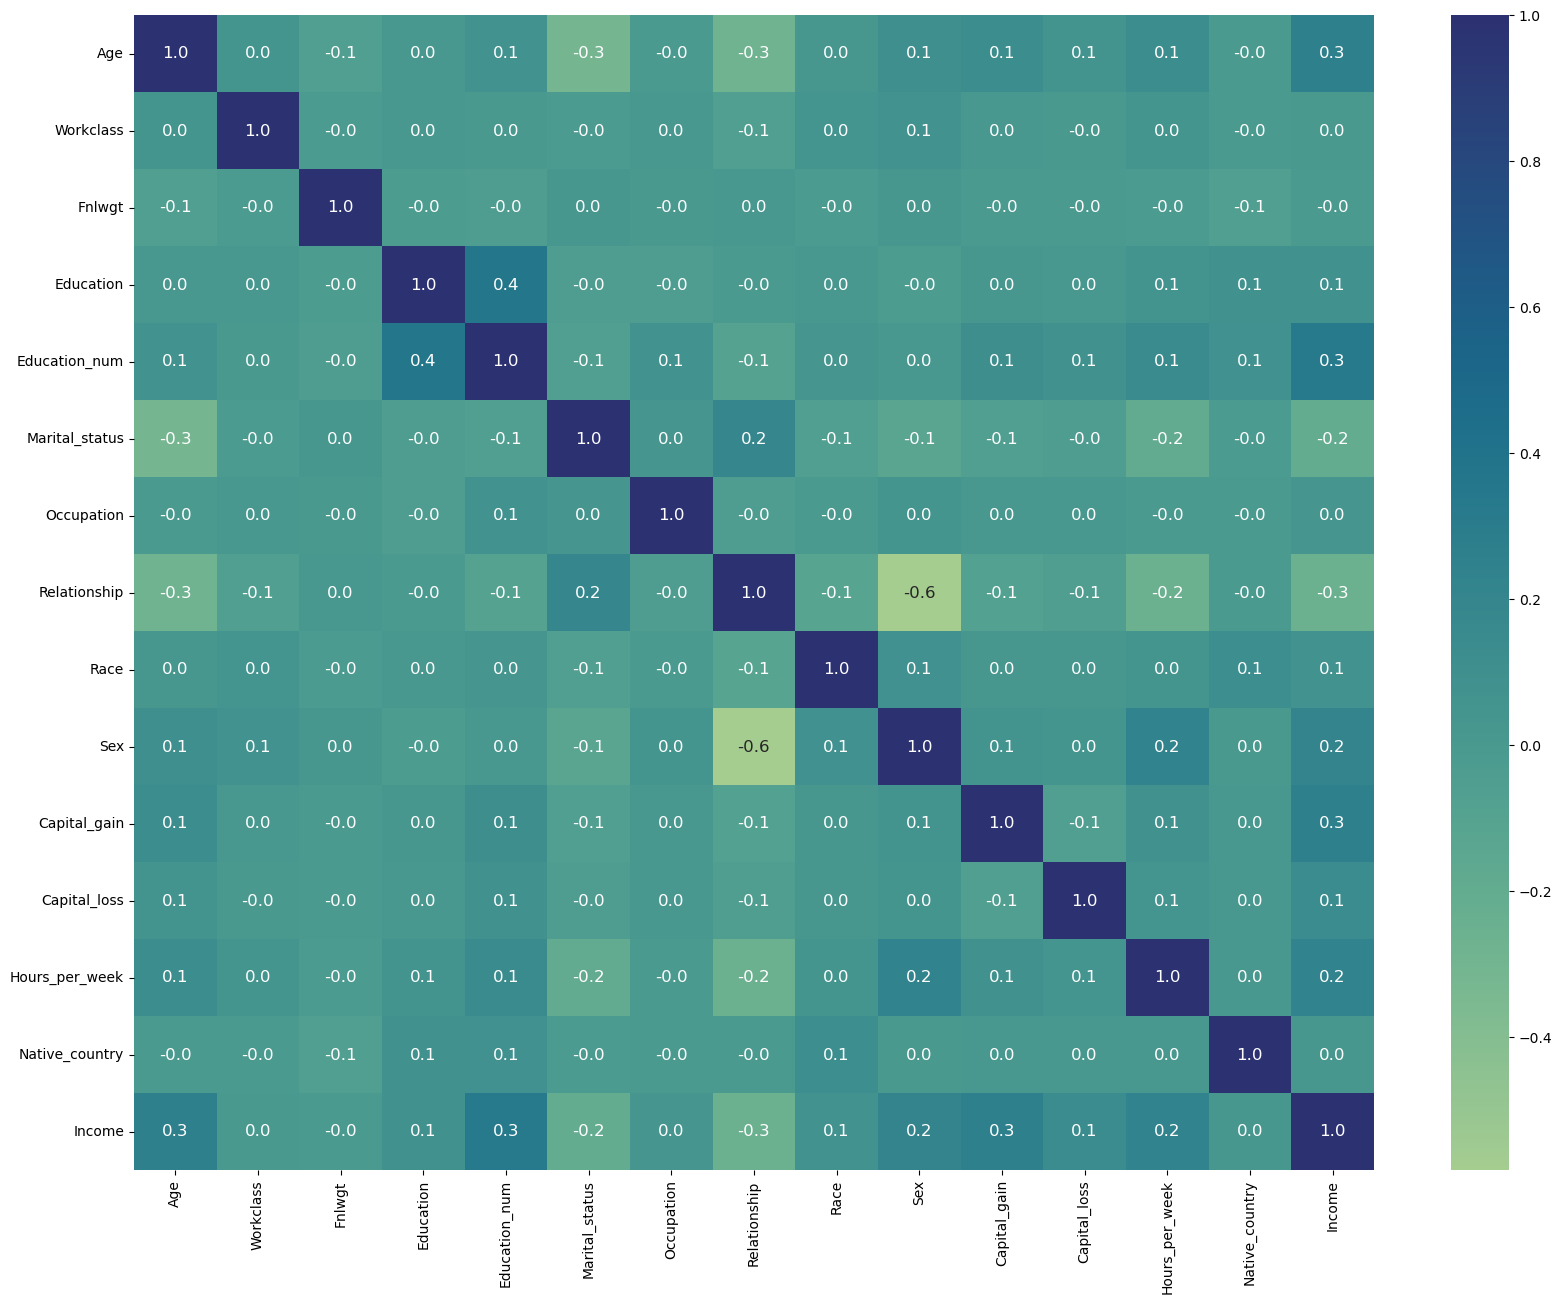

In [62]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_cor, annot=True, fmt='.1F', cmap='crest', annot_kws={"size": 12})
plt.show()

***Data splitting into X and Y***


In [68]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [69]:
x.shape

(25750, 14)

In [70]:
y.shape

(25750,)

***scaling X values***


In [71]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [72]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [73]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.0,25750.0,25750.000000,25750.000000
mean,0.410960,0.514136,0.455068,0.687487,0.537282,0.441392,0.468801,0.300264,0.891650,0.655029,0.0,0.0,0.488320,0.881733
std,0.213563,0.182124,0.178179,0.261703,0.184647,0.255965,0.307512,0.319276,0.307783,0.475368,0.0,0.0,0.153176,0.118871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.248293,0.500000,0.345165,0.600000,0.461538,0.333333,0.153846,0.000000,1.000000,0.000000,0.0,0.0,0.479452,0.904762
50%,0.413877,0.500000,0.467108,0.733333,0.538462,0.333333,0.461538,0.200000,1.000000,1.000000,0.0,0.0,0.493151,0.904762
75%,0.575094,0.500000,0.560184,0.800000,0.692308,0.666667,0.692308,0.600000,1.000000,1.000000,0.0,0.0,0.561644,0.904762
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


***data have been scaled***

<Axes: xlabel='Income', ylabel='count'>

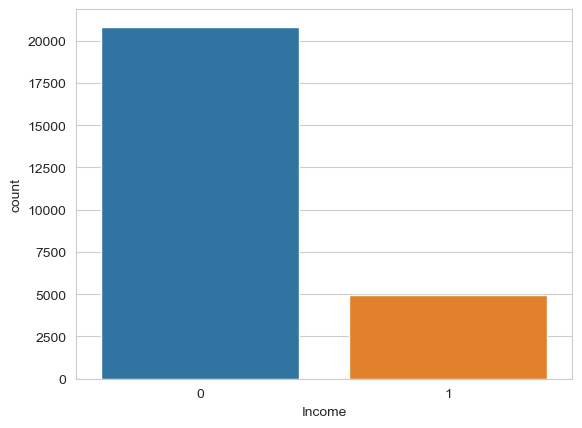

In [74]:
sns.set_style("whitegrid")
sns.countplot(x="Income", data=df)

In [75]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (25750,)
Resample Target dataset shape (41642,)


data has been balanced

***SPliting Train and Test data***

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [80]:
x_train.shape

(30398, 14)

In [81]:
x_test.shape

(11244, 14)

In [82]:
y_train.shape

(30398,)

In [83]:
y_test.shape

(11244,)

***MODEL SELECTION***

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import roc_auc_score, roc_curve


***logistic regression***

In [85]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7423513079827446


In [86]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))


0.7443970117395945
[[3942 1758]
 [1116 4428]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      5700
           1       0.72      0.80      0.75      5544

    accuracy                           0.74     11244
   macro avg       0.75      0.75      0.74     11244
weighted avg       0.75      0.74      0.74     11244

Training accuracy:: 0.7425488518981512
Test accuracy:: 0.7443970117395945


***decision tree classifier***

In [87]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.8461686070993227


In [88]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.8590359302739239
[[4849  851]
 [ 734 4810]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5700
           1       0.85      0.87      0.86      5544

    accuracy                           0.86     11244
   macro avg       0.86      0.86      0.86     11244
weighted avg       0.86      0.86      0.86     11244

Training accuracy:: 0.999967103098888
Test accuracy:: 0.8590359302739239


***KNeighborsClassifier***

In [89]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.8626874418501655


In [90]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.8694414799003913
[[4385 1315]
 [ 153 5391]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      5700
           1       0.80      0.97      0.88      5544

    accuracy                           0.87     11244
   macro avg       0.89      0.87      0.87     11244
weighted avg       0.89      0.87      0.87     11244

Training accuracy:: 0.8941377722218568
Test accuracy:: 0.8694414799003913


***RandomForestClassifier***

In [91]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score)) 

cross validation score for rfc: 0.8921303746536096


In [92]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.9073283528993241
[[4976  724]
 [ 318 5226]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      5700
           1       0.88      0.94      0.91      5544

    accuracy                           0.91     11244
   macro avg       0.91      0.91      0.91     11244
weighted avg       0.91      0.91      0.91     11244

Training accuracy:: 0.999967103098888
Test accuracy:: 0.9073283528993241


***ENSEMBLE TECHNIQUES***


1.ADA BOOST CLASSIFIER

In [94]:
from sklearn.ensemble import AdaBoostClassifier

adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8342071814316505


In [95]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8427605834222697
[[4554 1146]
 [ 622 4922]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5700
           1       0.81      0.89      0.85      5544

    accuracy                           0.84     11244
   macro avg       0.85      0.84      0.84     11244
weighted avg       0.85      0.84      0.84     11244

Training accuracy:: 0.8314033818014344
Test accuracy:: 0.8427605834222697


2.BAGGING CLASSIFIER

In [98]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8832264433150782


In [99]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.894432586268232
[[5061  639]
 [ 548 4996]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5700
           1       0.89      0.90      0.89      5544

    accuracy                           0.89     11244
   macro avg       0.89      0.89      0.89     11244
weighted avg       0.89      0.89      0.89     11244

Training accuracy:: 0.9932232383709455
Test accuracy:: 0.894432586268232


3.Gradient Boosting classifier

In [100]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8540436001489933


In [101]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8615261472785486
[[4489 1211]
 [ 346 5198]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      5700
           1       0.81      0.94      0.87      5544

    accuracy                           0.86     11244
   macro avg       0.87      0.86      0.86     11244
weighted avg       0.87      0.86      0.86     11244

Training accuracy:: 0.856372129745378
Test accuracy:: 0.8615261472785486


we chose RandomForestClassifier as final model for HYPER PARAMETER TUNING

***HYPER PARAMETER TUNING:***

In [102]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [103]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [104]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.9087513340448239


In [108]:
rfc_grid.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

***model training with best parameters***

In [109]:
best_param={
    'criterion' : ['entropy'],
    'n_estimators':[1000],
    'min_samples_split':[4],
     'random_state':[10]    }

In [110]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [111]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.9083066524368553


As we notice after HYPER PARAMETER TUNING models accuracy score got increased

***Report of RandomForestClassifier***

In [112]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.94      0.87      0.91      5700
           1       0.88      0.95      0.91      5544

    accuracy                           0.91     11244
   macro avg       0.91      0.91      0.91     11244
weighted avg       0.91      0.91      0.91     11244



<Axes: >

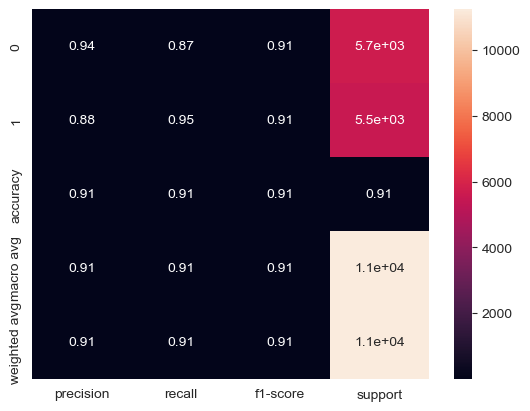

In [113]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [114]:
print("roc auc score::",roc_auc_score(y_test, best_rfc_pred))

roc auc score:: 0.9088480671375408


In [115]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_rfc_pred, pos_label=1)

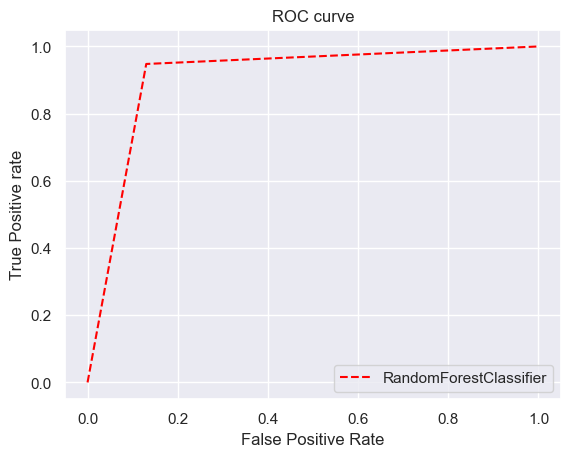

In [116]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='RandomForestClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [117]:
#saving model

import joblib

joblib.dump(best_rfc_grid.best_estimator_,'Census_Income_Project.obj')

['Census_Income_Project.obj']